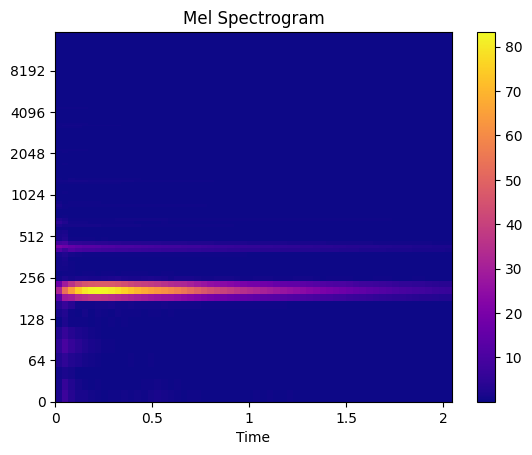

In [1]:
 import numpy as np
 import audioflux as af
 from audioflux.type import SpectralFilterBankScaleType
 
 # Get a 220Hz's audio file path
 sample_path = af.utils.sample_path('220')
 
 # Read audio data and sample rate
 audio_arr, sr = af.read(sample_path)

# Create BFT object and extract mel spectrogram
bft_obj = af.BFT(num=128, radix2_exp=12, samplate=sr,
                 scale_type=SpectralFilterBankScaleType.MEL)
spec_arr = bft_obj.bft(audio_arr)
spec_arr = np.abs(spec_arr)

# Display spectrogram
import matplotlib.pyplot as plt
from audioflux.display import fill_spec
audio_len = audio_arr.shape[0]
fig, ax = plt.subplots()
img = fill_spec(spec_arr, axes=ax,
          x_coords=bft_obj.x_coords(audio_len),
          y_coords=bft_obj.y_coords(),
          x_axis='time', y_axis='log',
          title='Mel Spectrogram')
fig.colorbar(img, ax=ax)

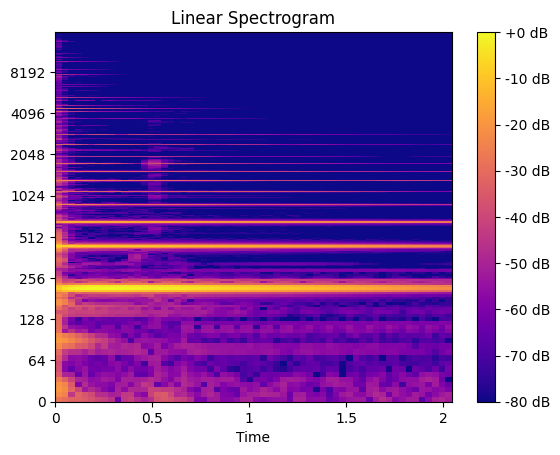

In [5]:
import matplotlib.pyplot as plt
from audioflux.display import fill_spec

low_fre = 0
spec_arr, fre_band_arr = af.linear_spectrogram(audio_arr, samplate=sr, low_fre=low_fre)
spec_dB_arr = af.utils.power_to_db(spec_arr)

# calculate x/y-coords
audio_len = audio_arr.shape[0]
x_coords = np.linspace(0, audio_len/sr, spec_arr.shape[1] + 1)
y_coords = np.insert(fre_band_arr, 0, low_fre)

fig, ax = plt.subplots()
img = fill_spec(spec_dB_arr, axes=ax,
                x_coords=x_coords,
                y_coords=y_coords,
                x_axis='time', y_axis='log',
                title='Linear Spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")